<a href="https://colab.research.google.com/github/dsinsight/Saddle-point-blog/blob/main/Saddle_Point_in_ML_and_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training loop
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}')


100%|██████████| 170498071/170498071 [00:04<00:00, 41434046.99it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch 1, Loss: 1.959870234489441
Epoch 2, Loss: 1.7398568305969238
Epoch 3, Loss: 1.6573762373924255
Epoch 4, Loss: 1.603873552083969
Epoch 5, Loss: 1.5639482862949372
Epoch 6, Loss: 1.532483897447586
Epoch 7, Loss: 1.5047956569194794
Epoch 8, Loss: 1.4802627990245818
Epoch 9, Loss: 1.4583385684490204
Epoch 10, Loss: 1.4369648561477661


# **Replacing SGD with Adam**

**Import Necessary Libraries**

First import the torch.optim module from the PyTorch library, which contains various optimization algorithms for training neural networks.

**Replace SGD with Adam Optimizer**

**Purpose:** After importing libraries we initializes an Adam optimizer for the neural network model represented by net.

**Parameters:**
- **net.parameters():** Retrieves the parameters of the model that will be updated during training.
- **lr=0.001:** Sets the learning rate to 0.001, which controls how much to change the model parameters during training.

**Training Loop with Adam Optimizer**

**Breakdown of the Training Loop**

- **Outer Loop:** Iterates through a specified number of epochs (10 in this case).
- **Inner Loop:** Iterates through batches of data provided by trainloader.
  - **inputs, labels = data:** Unpacks the input features and corresponding labels from the data.
  - **optimizer.zero_grad():** Clears the old gradients, which is necessary for the optimizer to avoid accumulating gradients from previous iterations.
  - **outputs = net(inputs):** Passes the input data through the model to get the predicted outputs.
  - **loss = criterion(outputs, labels):** Computes the loss using a defined loss function (criterion), which compares the predicted outputs with the true labels.
  - **loss.backward():** Computes the gradients of the loss with respect to the model parameters.
  - **optimizer.step():** Updates the model parameters using the calculated gradients.
  - **running_loss += loss.item():** Accumulates the loss for the current epoch.
  - **Print Statement:** At the end of each epoch, it prints the average loss over the training data for that epoch.

In [4]:
# Import necessary libraries
import torch.optim as optim

# Replace SGD with Adam optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Use the Adam optimizer

# Training loop with Adam optimizer
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}')


Epoch 1, Loss: 1.5803176786899567
Epoch 2, Loss: 1.4186463229656219
Epoch 3, Loss: 1.3404061582088471
Epoch 4, Loss: 1.2757435414791107
Epoch 5, Loss: 1.2364657318592072
Epoch 6, Loss: 1.197357409119606
Epoch 7, Loss: 1.1652598834037782
Epoch 8, Loss: 1.1321693431138993
Epoch 9, Loss: 1.098507237792015
Epoch 10, Loss: 1.0664558881521224


# **Using SGD with Momentum**

**Optimizer Initialization:**

  - **optim.SGD:** This initializes an SGD optimizer from the PyTorch library, designed to optimize the parameters of the net (the neural network).
  - **net.parameters():** This retrieves the parameters (weights and biases) of the network to be updated during training.
lr=0.001: Sets the learning rate to 0.001, determining the step size for each update during optimization.
  - **momentum=0.9:** Momentum is a technique that helps accelerate SGD in the relevant direction and dampens oscillations. A momentum of 0.9 means that 90% of the previous update's velocity will be retained.

**Training Loop:**

  - **for epoch in range(10):** This outer loop runs for 10 epochs, indicating that the entire dataset will be passed through the network 10 times.
  - **running_loss = 0.0:** Initializes a variable to keep track of the cumulative loss for the epoch.
  - **for i, data in enumerate(trainloader, 0):** This inner loop iterates over the training data provided by trainloader. Each batch of data consists of inputs (the features) and labels (the target outputs).
  - **optimizer.zero_grad():** Resets the gradients of all optimized parameters before the backward pass.
  - **outputs = net(inputs):** Passes the input batch through the network to get predictions.
  - **loss = criterion(outputs, labels):** Computes the loss (or error) between the predicted outputs and the true labels using a specified loss function (criterion).
  - **loss.backward():** Computes the gradient of the loss with respect to the parameters (weights) by backpropagation.
  - **optimizer.step():** Updates the network parameters based on the computed gradients and the optimizer's strategy (including momentum).
  - **running_loss += loss.item():** Accumulates the loss for the current epoch.

**Loss Printing:**

  - **print(f'Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}'):** At the end of each epoch, the average loss for that epoch is printed. This helps monitor the training process.


In [5]:
# Using SGD with momentum
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training loop with momentum
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}')


Epoch 1, Loss: 0.922934067606926
Epoch 2, Loss: 0.887342477440834
Epoch 3, Loss: 0.871238625049591
Epoch 4, Loss: 0.8599994453191757
Epoch 5, Loss: 0.8526569473743438
Epoch 6, Loss: 0.8446825994253159
Epoch 7, Loss: 0.839031252861023
Epoch 8, Loss: 0.8340681928396225
Epoch 9, Loss: 0.8287115931510926
Epoch 10, Loss: 0.8242433732748031


# **Visualizing Before and After Effects of Saddle Point Optimization**

## **Before (Using Original SGD without Momentum)**

### Explanation of the Code:

**Importing Libraries**: First import `matplotlib.pyplot`, a Python library used for plotting graphs and visualizing data.

**SGD Optimization Loop**: The code captures the average loss during each training epoch using Stochastic Gradient Descent (SGD) without momentum.
   
  - **Initialization**:
   - **`losses_sgd`:** An empty list to store the average loss for each epoch.
    - **`optimizer`:** Initializes the SGD optimizer with a learning rate (`lr`) of 0.001, and optimizes the parameters of a neural network model (`net.parameters()`).

  - **Training Loop**:
     
    - The training loop runs for 10 epochs, where each epoch involves iterating over a `trainloader` (data loader for mini-batch training).
    - For each batch:
      - The optimizer gradient is reset (`optimizer.zero_grad()`).
      - The network (`net`) processes the inputs to generate predictions (`outputs = net(inputs)`).
      - A loss value is calculated between predictions and actual labels using a predefined loss function (`criterion(outputs, labels)`).
      - Backpropagation is performed to compute gradients (`loss.backward()`), and the optimizer updates the model parameters (`optimizer.step()`).
      - `running_loss` accumulates the total loss for the current epoch.
      - After processing all mini-batches, the average loss for the epoch (`avg_loss`) is calculated by dividing `running_loss` by the number of batches (`len(trainloader)`). This average loss is added to `losses_sgd`.

**Plotting Loss**:

  - After training, the average loss per epoch (`losses_sgd`) is plotted against the number of epochs (1 to 10).
  - The graph shows how the loss decreases over time during training with SGD.




Epoch 1, Loss: 0.8071446799039841
Epoch 2, Loss: 0.8053289699554443
Epoch 3, Loss: 0.8045670039653778
Epoch 4, Loss: 0.8039614186286926
Epoch 5, Loss: 0.8034007558822632
Epoch 6, Loss: 0.8029953508973121
Epoch 7, Loss: 0.8026332204341888
Epoch 8, Loss: 0.8021223082542419
Epoch 9, Loss: 0.8018776448965073
Epoch 10, Loss: 0.8013610126972198


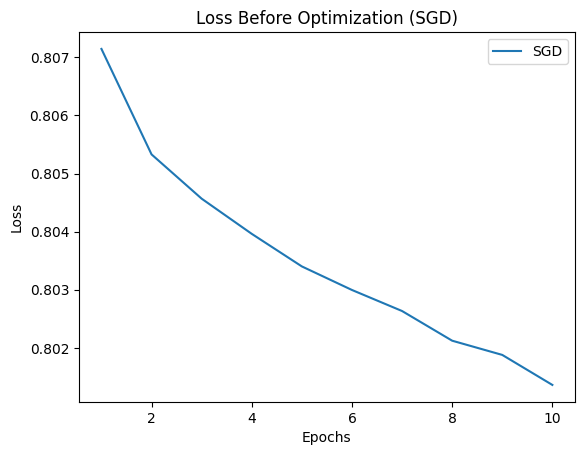

In [6]:
import matplotlib.pyplot as plt

# Original SGD without momentum, capturing loss
losses_sgd = []
optimizer = optim.SGD(net.parameters(), lr=0.001)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(trainloader)
    losses_sgd.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot loss for SGD
plt.plot(range(1, 11), losses_sgd, label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Before Optimization (SGD)')
plt.legend()
plt.show()


## **After (Using Adam Optimizer or SGD with Momentum)**

**Adam Optimizer Initialization:** The Adam optimizer is initialized with the neural network parameters (`net.parameters()`) and a learning rate (`lr=0.001`).

**Training Loop:** The loop runs for 10 epochs, where an epoch refers to one full pass over the training dataset.
   
   - **Epoch Loop:** The outer loop iterates over 10 epochs.

   - **Batch Loop:** The inner loop iterates over batches of data from the `trainloader`. Each batch contains a set of inputs (`inputs`) and corresponding labels (`labels`).

   - **Forward Pass:** The inputs are passed through the network (`net`) to get the predicted outputs (`outputs`).

   - **Loss Calculation:** The loss between the predicted outputs and the actual labels is computed using the predefined loss function (`criterion`).

   - **Backpropagation and Optimization:**  
    - `loss.backward()` computes the gradient of the loss with respect to the model parameters.
     - `optimizer.step()` updates the model parameters based on the gradients and the Adam optimization algorithm.

   - **Loss Accumulation:** The loss for each batch is accumulated over the entire epoch.

   - **Average Loss Calculation:** The average loss for each epoch is calculated and stored in the `losses_adam` list.

**Plotting the Loss:** After training, the code plots the loss for for each epoch using Matplotlib. This line generates a graph of the loss across 10 epochs.

Epoch 1, Loss: 1.038308641910553
Epoch 2, Loss: 0.9993563054800033
Epoch 3, Loss: 0.9606791644096374
Epoch 4, Loss: 0.9409018951654434
Epoch 5, Loss: 0.9268458477258682
Epoch 6, Loss: 0.9065835143327713
Epoch 7, Loss: 0.885388695716858
Epoch 8, Loss: 0.8763056117296218
Epoch 9, Loss: 0.8524376670122147
Epoch 10, Loss: 0.8380806605815887


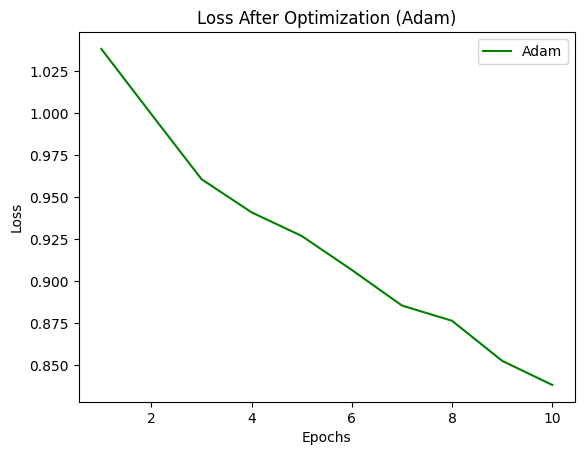

In [7]:
# Adam optimizer, capturing loss
losses_adam = []
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(trainloader)
    losses_adam.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot loss for Adam
plt.plot(range(1, 11), losses_adam, label='Adam', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss After Optimization (Adam)')
plt.legend()
plt.show()


## **Comparison Plot (Before and After Optimization)**

The code provided is for generating a comparison plot of loss values between two optimization algorithms, Stochastic Gradient Descent (SGD) and Adam.

  - **plt.plot(range(1, 11), losses_sgd, label='SGD', color='red'):** This line creates a line plot for the loss values (losses_sgd) obtained using the SGD optimizer.
    - **range(1, 11)** represents the x-axis values (1 to 10 epochs).
    - **losses_sgd** is an array or list containing the loss values over these 10 epochs.
    - The label **'SGD'** is used to identify the line in the legend. The line color is set to red.

  - **plt.plot(range(1, 11), losses_adam, label='Adam', color='green'):** This line creates another line plot for the loss values (losses_adam) using the Adam optimizer.
    - **range(1, 11)** again represents the epochs (same x-axis).
    - **losses_adam** is an array or list containing the loss values for the Adam optimizer. The line color is green, and the label is 'Adam'.

  - **plt.xlabel('Epochs'):** Sets the label for the x-axis as "Epochs" (the number of training iterations).

  - **plt.ylabel('Loss'):** Sets the label for the y-axis as "Loss", which represents the error or the loss function values.

  - **plt.title('Loss Comparison: SGD vs Adam'):** Gives the plot a title, "Loss Comparison: SGD vs Adam", to describe what the graph shows.

  - **plt.legend():** Adds a legend to the plot that labels each line according to the specified labels ('SGD' and 'Adam').

  - **plt.show():** Displays the plot with the provided data and configurations.

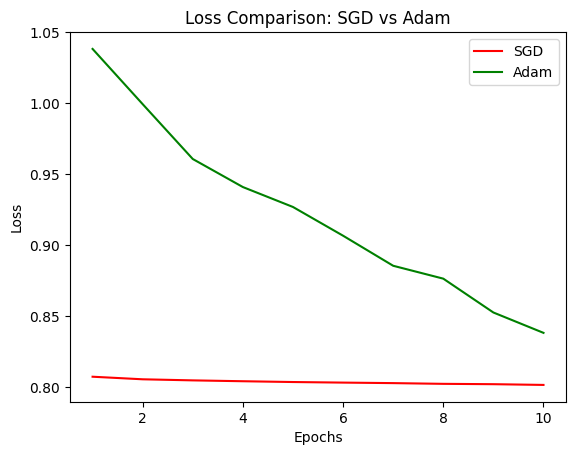

In [8]:
# Comparison Plot: SGD vs Adam
plt.plot(range(1, 11), losses_sgd, label='SGD', color='red')
plt.plot(range(1, 11), losses_adam, label='Adam', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison: SGD vs Adam')
plt.legend()
plt.show()


# **Strategies to Improve Saddle Point Handling**

## **Learning Rate Scheduling**


#### **1. Importing `matplotlib` for plotting:** This imports the **`matplotlib`** library, specifically its `pyplot` module, which is used to create various types of plots such as line plots, bar plots, etc.

#### **2. Initializing the Learning Rate Scheduler:** This sets up a learning rate scheduler using `StepLR`. It reduces the learning rate by a factor of **`gamma`** (0.1) every **`step_size`** (5) epochs. Adjusting the learning rate during training can help improve the model's performance, especially after it plateaus.

#### **3. Initializing `epoch_losses` List:** This initializes an empty list to store the average loss for each epoch. We store the average loss for each epoch so that it can be used to plot the loss curve later.

#### **4. Main Training Loop (over 10 epochs):** This is the main training loop that trains the model over 10 epochs.
  - **`running_loss = 0.0`**: Resets the running loss at the start of each epoch.
  - **Inner loop**: Loops over each batch in the training dataset (`trainloader`).
    - **`inputs, labels = data`**: Extracts input data and corresponding labels from the batch.
    - **`optimizer.zero_grad()`**: Resets the gradients to zero for each batch before backpropagation.
    - **`outputs = net(inputs)`**: Performs a forward pass through the neural network `net` to get predictions.
    - **`loss = criterion(outputs, labels)`**: Calculates the loss using the specified loss function (`criterion`), comparing predictions and actual labels.
    - **`loss.backward()`**: Backpropagates the loss to compute gradients for the model’s parameters.
    - **`optimizer.step()`**: Updates the model parameters using the computed gradients.
    - **`running_loss += loss.item()`**: Accumulates the loss for each batch in the `running_loss` variable.

  - This block is where the training happens. It updates the model's weights and calculates the total loss for each epoch.

#### **5. Learning Rate Scheduler Step:** This updates the learning rate after each epoch according to the scheduler's rules (in this case, reducing the learning rate by a factor of 0.1 every 5 epochs). Adjusting the learning rate during training can help the model converge better, especially when the loss plateaus or oscillates.

#### **6. Calculating and Storing the Average Loss for Each Epoch:**
  - **`avg_loss = running_loss / len(trainloader)`**: Computes the average loss for the current epoch by dividing the total accumulated loss (`running_loss`) by the number of batches in the training set (`len(trainloader)`).
  - **`epoch_losses.append(avg_loss)`**: Adds the calculated average loss to the `epoch_losses` list.
  - This allows you to track the average loss across epochs for later analysis and visualization.

#### **7. Printing the Average Loss per Epoch:** This prints the average loss for the current epoch. It provides real-time feedback on the model’s performance during training, allowing you to monitor how the loss is decreasing across epochs.
#### **8. Plotting the Loss Curve After Training:** This block plots the loss values stored in `epoch_losses` against the epoch numbers.
  - **`plt.plot(range(1, 11), epoch_losses)`**: Creates a line plot with epoch numbers on the x-axis (from 1 to 10) and average loss values on the y-axis.
  - **`marker='o'`**: Adds markers to each data point to make the plot more readable.
  - **`color='b'`**: Specifies blue color for the line.
  - **`plt.title('Training Loss per Epoch')`**: Adds a title to the plot.
  - **`plt.xlabel('Epoch')` and `plt.ylabel('Loss')`**: Label the x and y axes.
  - **`plt.grid(True)`**: Adds grid lines to the plot.
  - **`plt.legend()`**: Adds a legend to the plot, labeling the line as "Loss".
  - **`plt.show()`**: Displays the plot on the screen.
  
- This visualization helps you assess whether the training process is working correctly. If the loss is decreasing, the model is learning. If it plateaus or increases, there may be issues to investigate (e.g., learning rate, model architecture, etc.).


Epoch 1, Loss: 0.7405920437574387
Epoch 2, Loss: 0.736799397945404
Epoch 3, Loss: 0.711026372551918
Epoch 4, Loss: 0.7054688773751259
Epoch 5, Loss: 0.6827691122293472
Epoch 6, Loss: 0.5176242384314537
Epoch 7, Loss: 0.48635926461219786
Epoch 8, Loss: 0.47831941479444506
Epoch 9, Loss: 0.47204986268281934
Epoch 10, Loss: 0.4663036950826645


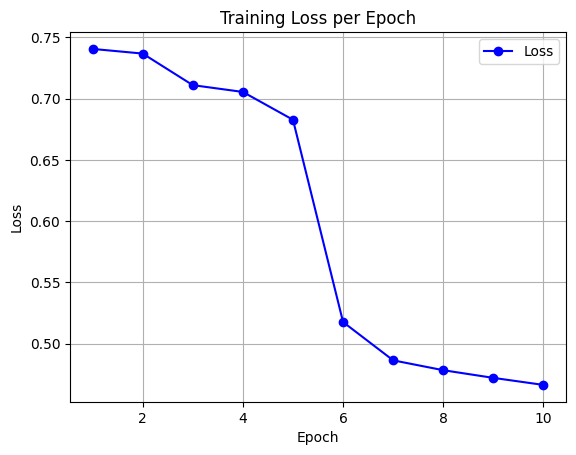

In [10]:
import matplotlib.pyplot as plt

# Initialize the learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# List to store the loss at each epoch
epoch_losses = []

for epoch in range(10):
    running_loss = 0.0  # Initialize running_loss at the start of each epoch
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Reset gradients

        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss

        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update model parameters

        running_loss += loss.item()  # Accumulate the loss (convert tensor to a Python number)

    scheduler.step()  # Adjust learning rate after every epoch

    # Compute average loss for this epoch
    avg_loss = running_loss / len(trainloader)
    epoch_losses.append(avg_loss)  # Store the average loss for this epoch

    # Print the average loss for this epoch
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plotting the loss curve
plt.plot(range(1, 11), epoch_losses, marker='o', color='b', label='Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


## **Weight Initialization**

####**Network Architecture:** The model uses two convolutional layers followed by max pooling, which is a standard architecture for image classification tasks. The fully connected layers are used to map the features extracted by the convolutional layers to the output classes.

####**He Initialization:** The weights of the convolutional and fully connected layers are initialized using He initialization, which helps improve training performance.

####**CIFAR-10 Dataset:** The dataset is loaded using the torchvision.datasets.CIFAR10 class, with normalization applied to improve training stability.

####**Training Loop:** The model is trained for 10 epochs, and the average loss is printed for each epoch. The loss history is stored for visualization.

####**Visualization:** The loss history is plotted to observe the training process and convergence behavior.

Files already downloaded and verified
Adam - Epoch 1, Loss: 1.2803
Adam - Epoch 2, Loss: 0.9186
Adam - Epoch 3, Loss: 0.7658
Adam - Epoch 4, Loss: 0.6414
Adam - Epoch 5, Loss: 0.5304
Adam - Epoch 6, Loss: 0.4308
Adam - Epoch 7, Loss: 0.3366
Adam - Epoch 8, Loss: 0.2578
Adam - Epoch 9, Loss: 0.1920
Adam - Epoch 10, Loss: 0.1493


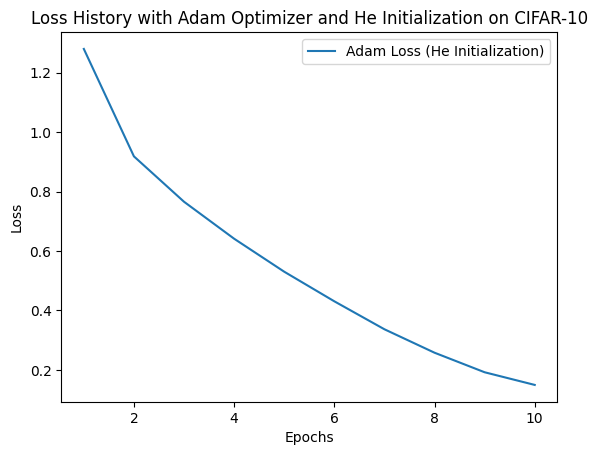

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Convolutional layer 1
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # Convolutional layer 2
        self.fc1 = nn.Linear(64 * 8 * 8, 128)         # Fully connected layer 1
        self.fc2 = nn.Linear(128, 10)                  # Output layer

        # Apply He initialization
        nn.init.kaiming_uniform_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # First convolutional layer with ReLU activation
        x = nn.MaxPool2d(2)(x)         # Max pooling
        x = torch.relu(self.conv2(x))  # Second convolutional layer with ReLU activation
        x = nn.MaxPool2d(2)(x)         # Max pooling
        x = x.view(-1, 64 * 8 * 8)     # Flatten the input
        x = torch.relu(self.fc1(x))     # Fully connected layer with ReLU activation
        x = self.fc2(x)                 # Output layer
        return x

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the model, loss function, and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Define a function to train the model and store the loss history
def train_model(optimizer, optimizer_name):
    loss_history = []

    # Training loop
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()  # Clear the gradients
            outputs = net(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
            running_loss += loss.item()  # Accumulate loss
        avg_loss = running_loss / len(trainloader)
        loss_history.append(avg_loss)
        print(f'{optimizer_name} - Epoch {epoch+1}, Loss: {avg_loss:.4f}')

    return loss_history

# Train the model using Adam optimizer with He initialization
adam_loss_history = train_model(optimizer, "Adam")

# Plot the loss history for visualization
plt.plot(range(1, 11), adam_loss_history, label='Adam Loss (He Initialization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History with Adam Optimizer and He Initialization on CIFAR-10')
plt.legend()
plt.show()
